In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
Station1 = r'C:\Users\Asus\Documents\Backup Detha\Master Degree\Wageningen\Lecture\Data Science\Assignments\Group Project\Statistical Analysis\Cluster D\AQI\jawaharlal-nehru.csv'
df1 = pd.read_csv(Station1)
print(df1.head(3))

       date  AQI
0  1-6-2023  102
1  2-6-2023   91
2  3-6-2023   98


In [4]:
Station2 = r'C:\Users\Asus\Documents\Backup Detha\Master Degree\Wageningen\Lecture\Data Science\Assignments\Group Project\Statistical Analysis\Cluster D\AQI\major-dhyan.csv'
df2 = pd.read_csv(Station2)
print(df2.head(3))

       date  AQI
0  1-6-2023  108
1  2-6-2023   98
2  3-6-2023  119


In [5]:
Station3 = r'C:\Users\Asus\Documents\Backup Detha\Master Degree\Wageningen\Lecture\Data Science\Assignments\Group Project\Statistical Analysis\Cluster D\AQI\r.k.-puram.csv'
df3 = pd.read_csv(Station3)
print(df3.head(3))

       date  AQI
0  1-6-2023  143
1  2-6-2023  131
2  3-6-2023  130


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

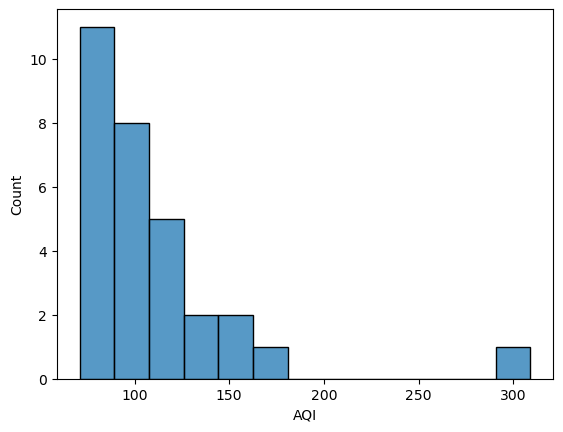

The dataset does not follow a normal distribution.


In [7]:
Weather1 = df1['AQI']
sns.histplot(Weather1)
plt.show()
statistic, p_value = shapiro(df1['AQI'])

alpha = 0.05
if p_value > alpha:
    print("The dataset follows a normal distribution.")
else:
    print("The dataset does not follow a normal distribution.")

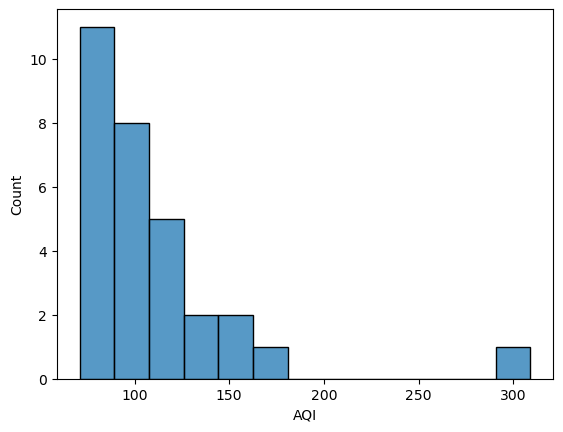

The dataset does not follow a normal distribution.


In [8]:
Weather2 = df2['AQI']
sns.histplot(Weather1)
plt.show()
statistic, p_value = shapiro(df2['AQI'])

alpha = 0.05
if p_value > alpha:
    print("The dataset follows a normal distribution.")
else:
    print("The dataset does not follow a normal distribution.")

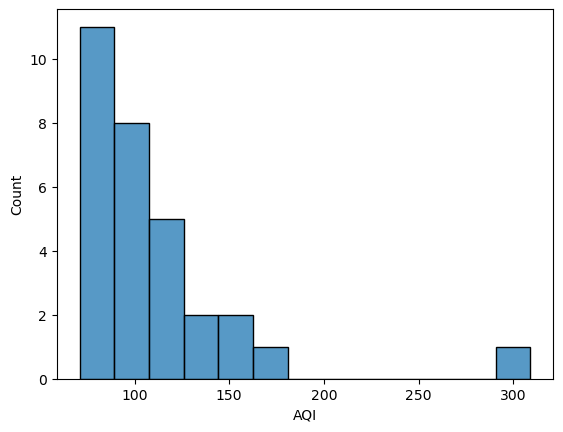

The dataset does not follow a normal distribution.


In [9]:
Weather3 = df3['AQI']
sns.histplot(Weather1)
plt.show()
statistic, p_value = shapiro(df3['AQI'])

alpha = 0.05
if p_value > alpha:
    print("The dataset follows a normal distribution.")
else:
    print("The dataset does not follow a normal distribution.")

# Kruskal-Wallis Test

All the dataset does not follow normal distribution, therefore a non-parametric statistical method is chosen. We use Kruskal-Wallis test to see whether there's a significant difference between dataset.

H0 : the distributions of all groups are equal (there's no difference among groups)
H1 : at least one group has a different distribution (there's a difference among groups)

In [10]:
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import seaborn as sns

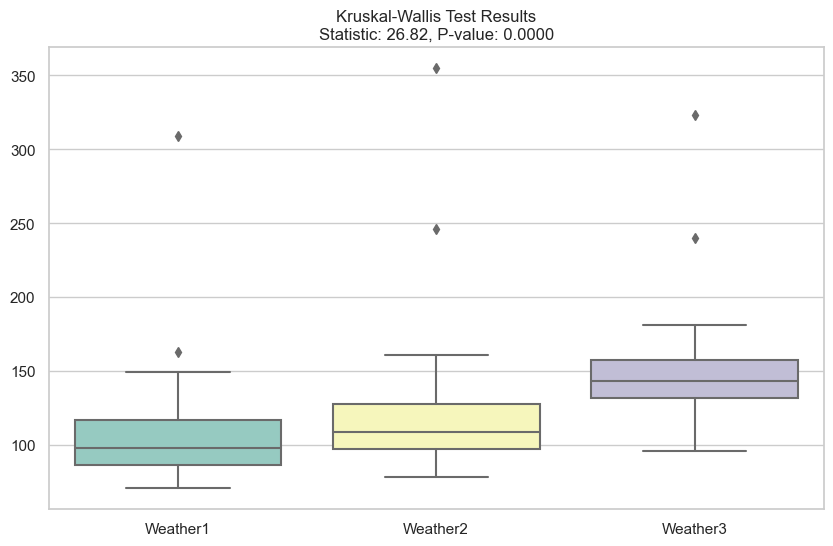

Kruskal-Wallis Statistic: 26.822048655429175
P-value: 1.4985324016292466e-06
There is a significant difference between at least two groups.


In [11]:
statistic, p_value = kruskal(Weather1, Weather2, Weather3)

data = pd.DataFrame({
    'Weather1': Weather1,
    'Weather2': Weather2,
    'Weather3': Weather3
})

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=data, palette="Set3")
plt.title('Kruskal-Wallis Test Results\n'
          f'Statistic: {statistic:.2f}, P-value: {p_value:.4f}')
plt.show()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.violinplot(data=data, palette="Set3")
plt.title('Kruskal-Wallis Test Results\n'
          f'Statistic: {statistic:.2f}, P-value: {p_value:.4f}')
plt.show()

print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference between at least two groups.")
else:
    print("There is no significant difference between the groups.")

# Correlation Analysis

Spearman rank correlation analysis is chosen as a non-parametric method to see whether there's a correlation between NDVI and air quality, how strong the correlation is, and in which direction the correlation goes

H0 : There's no correlation between NDVI and air quality
H1 : There's a correlation between NDVI and air quality

In [12]:
from scipy.stats import spearmanr

In [13]:
Station_All = r'C:\Users\Asus\Documents\Backup Detha\Master Degree\Wageningen\Lecture\Data Science\Assignments\Group Project\Statistical Analysis\Cluster D\AQI\AQI_NDVI_clusterD.csv'
dfall = pd.read_csv(Station_All)
print(dfall.head(3))

         date  AQI      NDVI
0  01/06/2023  102  0.366401
1  02/06/2023   91  0.366401
2  03/06/2023   98  0.366401


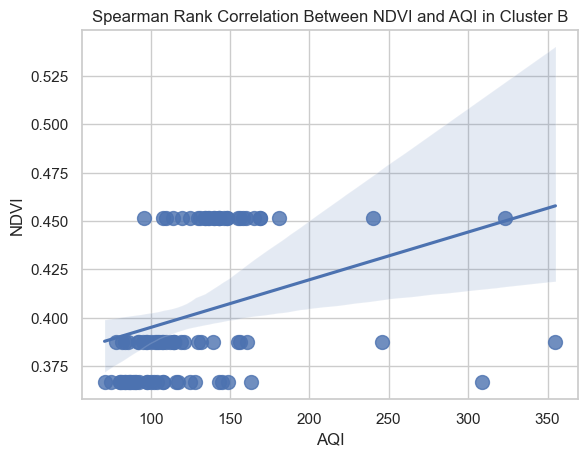

The correlation is statistically significant.
Spearman correlation coefficient: 0.5330828358428458
P-value: 6.33419379711649e-08


In [14]:
x = dfall['AQI']
y = dfall['NDVI']
corr_coefficient, p_value = spearmanr(x, y)

sns.regplot(x=x, y=y, scatter_kws={'s': 100})
plt.xlabel('AQI')
plt.ylabel('NDVI')
plt.title('Spearman Rank Correlation Between NDVI and AQI in Cluster B')
plt.show()

alpha = 0.05
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("There is no statistically significant correlation.")

print("Spearman correlation coefficient:", corr_coefficient)
print("P-value:", p_value)